What are the most in demand skills for the top 3 most popular Data roles? 

Methodology:
1. Clean up skill column
2. Calculate skill count based on 'job_title_short' column in the DataFrame.
3. Calculate skill percentage(%)
4. Plot final findings

In [ ]:
# Importing Libraries
import ast
import pandas as pd 
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Data Cleanup
def clean_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
    else:
        return
    
df['job_skills'] = df['job_skills'].apply(clean_list)

In [2]:
#Filtering the Dataset to analyse the Indian Job Market
df_IND = df[df['job_country'] == 'India']

In [3]:
#Exploding the 'job_skills' column to get the skill count
df_IND_skills = df_IND.explode('job_skills')

In [4]:
#Grouping the Dataset by 'job_skills' and 'job_title' AND creating a DataFrame with skills,title and skill_count
df_IND_skill_count = df_IND_skills.groupby(by=['job_skills','job_title_short']).size()
df_IND_skill_count = df_IND_skill_count.reset_index(name='skill_count')
df_IND_skill_count = df_IND_skill_count.sort_values(by='skill_count',ascending=False)

In [5]:
#Filtering the skill_count Dataframe to get the top 3 Data roles
job_titles = df_IND['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles 

['Data Analyst', 'Data Engineer', 'Data Scientist']

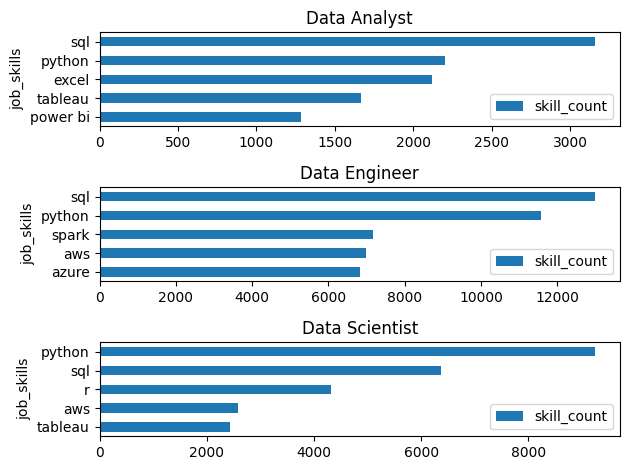

In [6]:
#Plotting the Data
fig,ax = plt.subplots(len(job_titles),1)

for i , job_title in enumerate(job_titles):
    df_plot = df_IND_skill_count[df_IND_skill_count['job_title_short'] == job_titles[i]].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax= ax[i],title = job_title)
    ax[i].invert_yaxis()


fig.tight_layout()

In [7]:
#Converting skill count to skill percentage out of total jobs
df_total_jobs = df_IND['job_title_short'].value_counts()
df_total_jobs = df_total_jobs.reset_index(name = 'total_jobs')
df_total_jobs


,job_title_short,total_jobs
0,Data Engineer,19062
1,Data Scientist,13279
2,Data Analyst,6121
3,Senior Data Engineer,4353
4,Senior Data Scientist,2486
5,Business Analyst,1887
6,Software Engineer,1795
7,Senior Data Analyst,1083
8,Machine Learning Engineer,671
9,Cloud Engineer,351


In [8]:
df_merge = pd.merge(df_IND_skill_count,df_total_jobs,how='left',on='job_title_short')
df_merge['skill_perc'] = 100 * df_merge['skill_count']/df_merge['total_jobs']
df_merge

,job_skills,job_title_short,skill_count,total_jobs,skill_perc
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,esquisse,Data Scientist,1,13279,0.007531
1685,node.js,Senior Data Analyst,1,1083,0.092336
1686,matlab,Cloud Engineer,1,351,0.284900
1687,fastapi,Cloud Engineer,1,351,0.284900


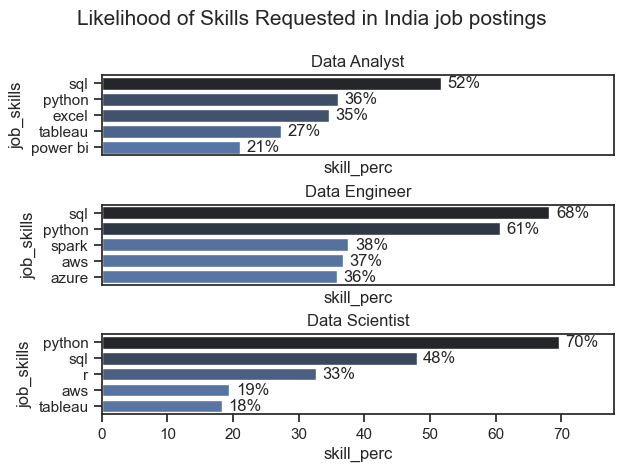

In [25]:
#Plotting Again for skill percentage
fig,ax = plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')
for i , job_title in enumerate(job_titles):
    df_plot = df_merge[df_merge['job_title_short'] == job_titles[i]].head(5)
    sns.barplot(data = df_plot,x='skill_perc',y='job_skills',ax= ax[i],hue = 'skill_count',palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,78)
    for n,v in enumerate(df_plot['skill_perc']):
        ax[i].text(v+1,n,f'{v:.0f}%',va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in India job postings',fontsize=15)
fig.tight_layout(h_pad = 0.5)